# Project: Investigate No-show Appointments Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>  
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from +110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.  

A number of characteristics about the patient are included in each row  for 14 associated variables as following:


 - **PatientId:** Represents a unique identification of a patient.


 - **AppointmentID:** Represents a unique identification of each appointment.  


 - **Gender:** Represents the patient gender, Male or Female.


 - **ScheduledDay:** It is the date when patients called or registered the appointment, it is obviously before the visiting date.


 - **AppointmentDay:** It is the date of the actual scheduled appointment, when the patients have to visit the doctor.


 - **Age:** Represents how old is the patient.


 - **Neighbourhood:** It is the place of the appointment where the patients shall attend.


 - **Scholarship:** It indicates whether or not the patient is enrolled in Brazilian social welfare program "Bolsa Família" and it contains two values: 0 means that patient not enrolled and 1 means that patient enrolled.


 - **Hipertension:** It indicates if the patient diagnosed with hypertension or not. (0 means No, 1 means Yes).


- **Diabetes:** It indicates if the patient diagnosed with Diabetes or not. (0 means No, 1 means Yes).


 - **Alcoholism:** It indicates if the patient is an alcoholic or not. (0 means No, 1 means Yes).


 - **Handcap:** It indicates if the patient is handicapped or not. (it contains values from 0 to 1, 0 means No, 1 or more means Yes).


 - **SMS_received:** It indicates if there are messages sent to the patient regarding the appointment or not. (0 means No, 1 means Yes).


 - **No-show:** It indicates if the patient showed up to their appointment or not, it has two values, ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not showed up.



### Research Questions

1 - What is the relation between the gender and the appointment showing up?

2 - What is the relation between the age and the appointment showing up?

3 - Which neighborhood has more appointments?

4 - Does the scholarship has a relation with appointment showing up?

5 - Do the different diseases have a relation with appointments showing up?

6 - Does receiving SMS has a relation with appointment showing up?

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties


In [2]:
#Loading the dataset, change the type of 'ScheduledDay' and 'AppointmentDay' columns
# to be datetime type instead of string and print out the first five rows
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', parse_dates = ["ScheduledDay","AppointmentDay"])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is a problem in the Age values, there is a negative value of -1.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [5]:
df.shape

(110527, 14)

In [6]:
#Check if the DataFrame contains any dublicated values
df.duplicated(["PatientId","AppointmentID"]).sum()

0

In [7]:
#Check if the DataFrame contains NaN values
df.isnull().sum().sum()

0


### Data Cleaning

In [8]:
#Remove the unnecessary columns 'PatientId' and 'AppointmentID'
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.shape

(110527, 12)

In [10]:
#Rename the columns to be more readable and to remove the typing mistakes
df.rename(columns = {'Neighbourhood': 'Neighborhood',
                     'Hipertension': 'Hypertension',
                     'No-show': 'miss_appointment',
                     'ScheduledDay': 'Scheduled_Day',
                     'AppointmentDay': 'Appointment_Day',
                     'Handcap': 'Handicap'}, inplace = True)

df = df.rename(columns=lambda x: x.lower())
df.head(1)

,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,miss_appointment
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
df.head()

,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,miss_appointment
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#Creating a new columns for the waiting days, scheduled day name and scheduled month name
df['waiting_days'] = abs(df.appointment_day - df.scheduled_day).dt.days
df['sch_day_name'] = df.scheduled_day.dt.day_name()
df['sch_month_name'] = df.scheduled_day.dt.month_name()
df.head()

,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,miss_appointment,waiting_days,sch_day_name,sch_month_name
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,April
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,April
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,April
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,April
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,April


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   gender            110527 non-null  object             
 1   scheduled_day     110527 non-null  datetime64[ns, UTC]
 2   appointment_day   110527 non-null  datetime64[ns, UTC]
 3   age               110527 non-null  int64              
 4   neighborhood      110527 non-null  object             
 5   scholarship       110527 non-null  int64              
 6   hypertension      110527 non-null  int64              
 7   diabetes          110527 non-null  int64              
 8   alcoholism        110527 non-null  int64              
 9   handicap          110527 non-null  int64              
 10  sms_received      110527 non-null  int64              
 11  miss_appointment  110527 non-null  object             
 12  waiting_days      110527 non-null  int64    

In [14]:
#Remove the record of age with negative value as it is not reasonable
df.drop(df.query('age == -1').index, inplace=True)
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [15]:
#Changing the values in 'gender' column to be 'Male' and 'Female' instead of 'M' and 'F'
df['gender'] = df['gender'].str.replace("M","Male").str.replace("F","Female")
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
#Changing the values greater than '1' in 'handicap' column to be '1'
df['handicap'] = df['handicap'].apply(lambda x: 0 if x == 0 else 1)

In [17]:
#Changing the values in 'miss_appointment' column to be binary (1 and 0) instead of 'Yes' and 'No'
df['miss_appointment'].replace(to_replace=['Yes', 'No'], value=[1, 0], inplace=True)

In [18]:
#Count the number of each value in gender column
df.gender.value_counts()

Female    71839
Male      38687
Name: gender, dtype: int64

In [19]:
#Count the number of each value in handicap column
df.handicap.value_counts()

0    108285
1      2241
Name: handicap, dtype: int64

In [20]:
#Count the number of each value in scholarship column
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [21]:
#Count the number of each value in hypertension column
df.hypertension.value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

In [22]:
#Count the number of each value in diabetes column
df.diabetes.value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

In [23]:
#Count the number of each value in sms_received column
df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

In [24]:
#Count the number of each value in attend_appointment column
df.miss_appointment.value_counts()

0    88207
1    22319
Name: miss_appointment, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


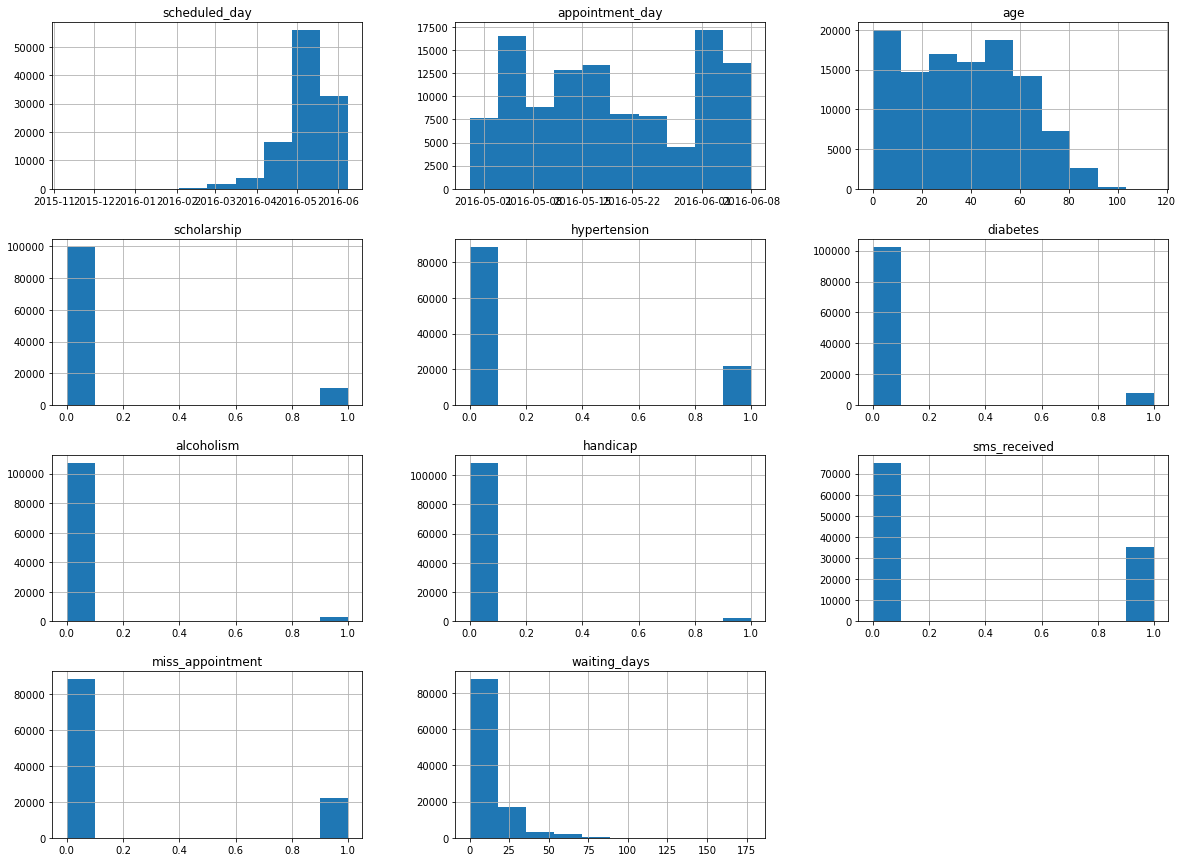

In [25]:
# Draw histogram for all columns
df.hist(figsize= (20,15));

>#### Observations
>
> - Most appointments are booked by patients within the age of 0 to 60 years.
>
> - Patients diagnosed with alcoholism, diabetes, and handicap who made appointments are fewer compared to hypertensive ones.
>
> - The distribution of waiting days is sharply right-skewed. This means that most appointments are booked close to the scheduled day.
>
> - About 32% of appointments made received SMS notification.
>
> - About 10% of appointments were made by patients on scholarship.

In [26]:
def draw_count_plot(var1, var2):
    '''
    This function used to draw count plot from seaborn.
    It takes two variables as arguments which are two different columns.
    It draws a countplot for both variables.
    
    '''
    f, ax = plt.subplots(1, 1, figsize = (10, 7))
    sns.countplot(x=var1, data=df, hue=var2);
    ax.set_title(var1 + ' vs ' + var2,fontsize=14);

In [27]:
def draw_pie_plot(var):
    '''
    This function used to draw pie plot.
    It takes one variable as an argument, which is a column name of a data frame.
    It draws a pie plot for the proportional of this variable.
    
    '''
    df[var].value_counts().plot(kind='pie', 
                                title='Proportion of medical appointments by ' + var,
                                labels= ['No', 'Yes'], figsize=(6,6), autopct='%1.0f%%');

*The percentage of missing the medical appointments*

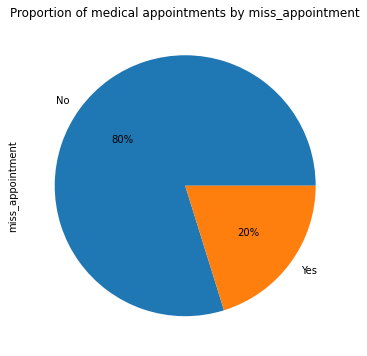

In [28]:
draw_pie_plot('miss_appointment')

>We can see that 20% of patients are missing thier appointments.

### Research Question 1: What is the relation between the gender and the appointment showing up?

*The proportion of medical appointments by gender*

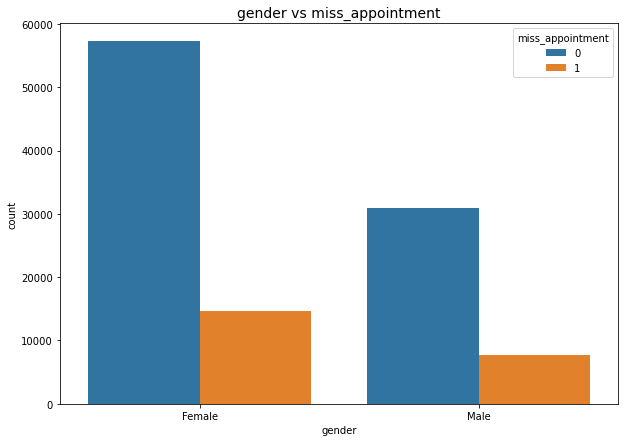

In [29]:
draw_count_plot('gender', 'miss_appointment')

>We can see that the rate of females have medical appointment is greater than males.

In [30]:
male_attend = df.query('gender=="Male"')['miss_appointment'].mean()
male_attend

0.19967947889471915

>About 20% of males are miss their appointments.

In [31]:
female_attend = df.query('gender=="Female"')['miss_appointment'].mean()
female_attend

0.20314870752655242

>About 20% of females are miss their appointments.

### Research Question 2: What is the relation between the age and the number of appointments?

In [32]:
#Seperating the age column to bins according to Statistics Canada website.
children = "00-14"
youth = "15-24"
adult = "25-64"
seniors = "65 and Above"

age_bins = pd.IntervalIndex.from_tuples([(0, 14), (15, 24), (25, 64), (64, max(df["age"]))])
age_labels = ["Children", "Youth", "Adult", "Seniors"]
df["age_groups"] = pd.cut(df["age"], bins=age_bins, labels=age_labels)
df["age_groups"].replace(age_bins, age_labels, inplace=True)
df[["age_groups"]].head()


,age_groups
0,Adult
1,Adult
2,Adult
3,Children
4,Adult


In [33]:
age_groups_attendance = df['miss_appointment'].groupby(df["age_groups"]).value_counts().unstack()
age_groups_attendance

miss_appointment,0,1
age_groups,,
Children,15431,4287
Youth,9581,3218
Adult,46257,11268
Seniors,12169,2233


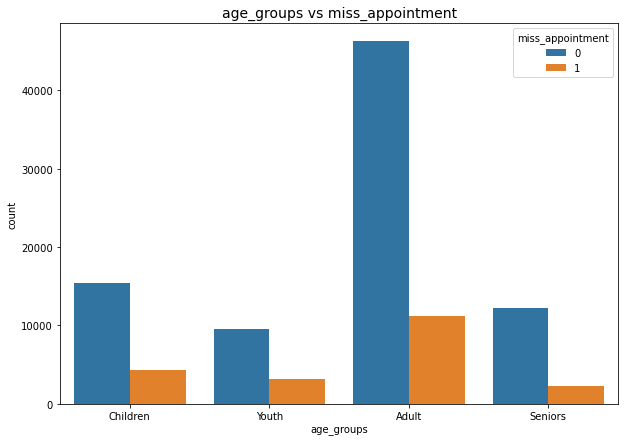

In [34]:
draw_count_plot('age_groups', 'miss_appointment')

>We can see that the adult patients have higher attendence rates to appointments than other age categories.

### Research Question 3: Which neighborhood has more appointments?

In [35]:
neighbor_attend = df.query('miss_appointment == 0')['neighborhood'].value_counts()
neighbor_attend

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: neighborhood, Length: 80, dtype: int64

In [36]:
neighbor_miss = df.query('miss_appointment == 1')['neighborhood'].value_counts()
neighbor_miss

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: neighborhood, Length: 80, dtype: int64

In [37]:
neighbor_combined = pd.concat([neighbor_attend, neighbor_miss], axis=1, sort=True)
neighbor_combined.columns = ['attend', 'miss']
neighbor_combined = neighbor_combined.sort_values("attend", ascending=False)
neighbor_combined.fillna(value=0, inplace=True)
neighbor_combined

,attend,miss
JARDIM CAMBURI,6252.0,1465.0
MARIA ORTIZ,4586.0,1219.0
RESISTÊNCIA,3525.0,906.0
JARDIM DA PENHA,3246.0,631.0
SANTA MARTHA,2635.0,496.0
...,...,...
ILHA DO BOI,32.0,3.0
ILHA DO FRADE,8.0,2.0
AEROPORTO,7.0,1.0
PARQUE INDUSTRIAL,1.0,0.0


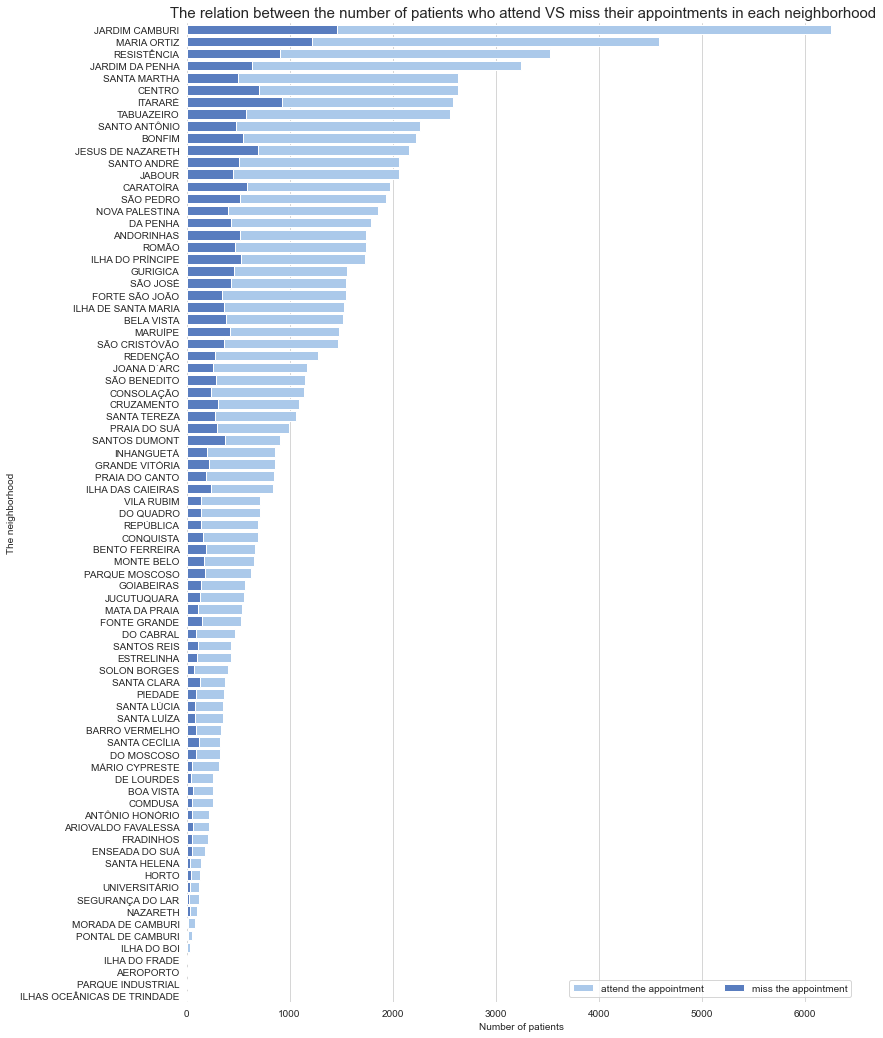

In [38]:
sns.set_style("whitegrid")

f, ax = plt.subplots(figsize=(12, 18))

sns.set_color_codes("pastel")
sns.barplot(x='attend', y= neighbor_combined.index, data=neighbor_combined, label="attend the appointment", color="b")

sns.set_color_codes("muted")
sns.barplot(x='miss', y=neighbor_combined.index, data=neighbor_combined, label="miss the appointment", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 6500), ylabel="The neighborhood", xlabel="Number of patients")
ax.set_title(" The relation between the number of patients who attend VS miss their appointments in each neighborhood",fontsize=15)
sns.despine(left=True, bottom=True)

>We can see that JARDIM CAMBURI neighborhood has the most number of appointments.

### Research Question 4: Does the scholarship has a relation with appointment showing up?

#### *The proportion of medical appointments by scholarship*

In [39]:
df['scholarship'].value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

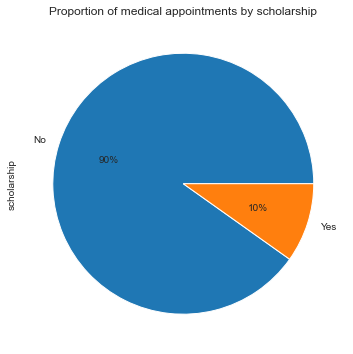

In [40]:
draw_pie_plot('scholarship')

>We can see that 10% of patients have scholarship.

In [41]:
df['miss_appointment'].groupby(df["scholarship"]).value_counts().unstack()

miss_appointment,0,1
scholarship,,
0,79924,19741
1,8283,2578


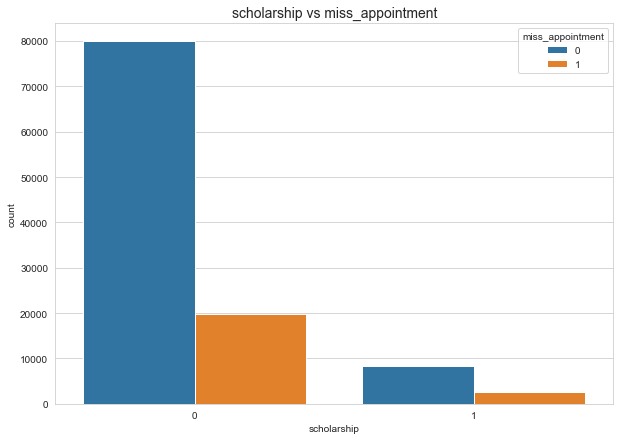

In [42]:
draw_count_plot('scholarship', 'miss_appointment')

In [43]:
df.groupby('scholarship').mean().loc[:, 'miss_appointment']

scholarship
0    0.198074
1    0.237363
Name: miss_appointment, dtype: float64

>We can see that 24% of patients have scholarship are miss their appointments, and about 20% of patients not have scholarship are miss their appointments.

### Research Question 5: Do the different diseases have a relation with appointments showing up?

#### *The proportion of medical appointments by handicap*

In [44]:
df['handicap'].value_counts()

0    108285
1      2241
Name: handicap, dtype: int64

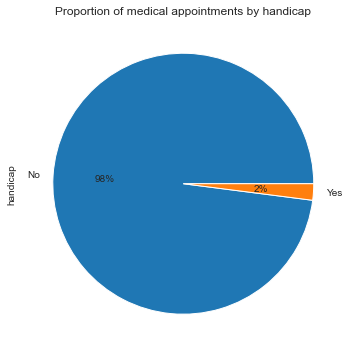

In [45]:
draw_pie_plot('handicap')

>We can see that 2% of patients are handicapped.

In [46]:
df['miss_appointment'].groupby(df["handicap"]).value_counts().unstack()

miss_appointment,0,1
handicap,,
0,86373,21912
1,1834,407


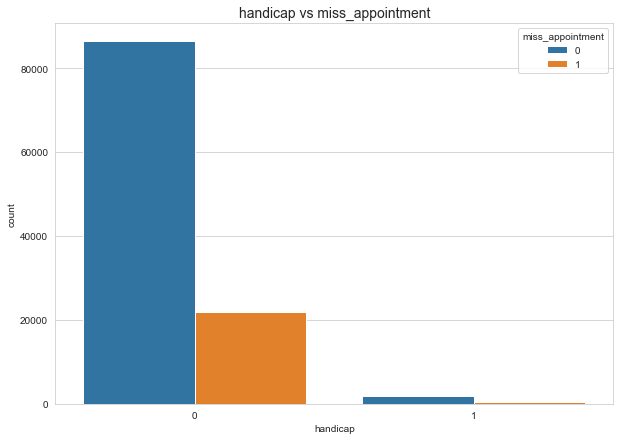

In [47]:
draw_count_plot('handicap', 'miss_appointment')

In [48]:
df.groupby('handicap').mean().loc[:, 'miss_appointment']

handicap
0    0.202355
1    0.181615
Name: miss_appointment, dtype: float64

>We can see that 18% of handicapped patients are miss their appointments, and about 20% of non-handicapped patients are miss their appointments.

#### *The proportion of medical appointments by hypertension*

In [49]:
df['hypertension'].value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

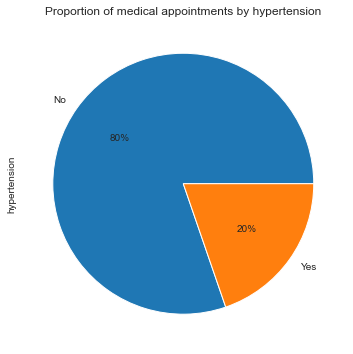

In [50]:
draw_pie_plot('hypertension')

>We can see that 20% of patients are hypertensive.

In [51]:
df['miss_appointment'].groupby(df["hypertension"]).value_counts().unstack()

miss_appointment,0,1
hypertension,,
0,70178,18547
1,18029,3772


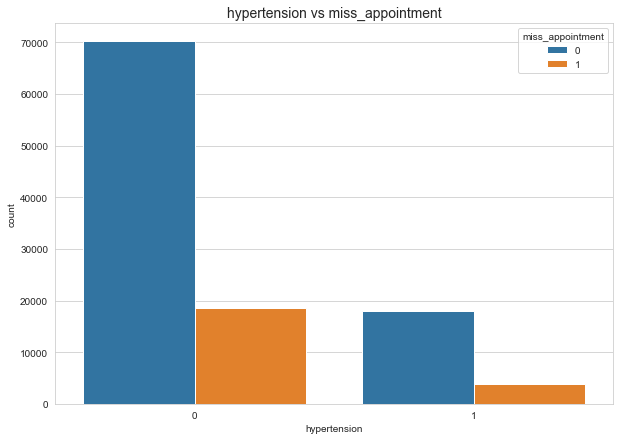

In [52]:
draw_count_plot('hypertension', 'miss_appointment')

In [53]:
df.groupby('hypertension').mean().loc[:, 'miss_appointment']

hypertension
0    0.209039
1    0.173020
Name: miss_appointment, dtype: float64

>We can see that 17% of hypertensive patients are miss their appointments, and about 20% of non-hypertensive are miss their appointments.

#### *The proportion of medical appointments by diabetes*

In [54]:
df['diabetes'].value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

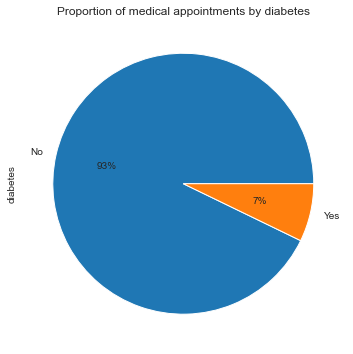

In [55]:
draw_pie_plot('diabetes')

>We can see that 7% of patients are diabetic.

In [56]:
df['miss_appointment'].groupby(df["diabetes"]).value_counts().unstack()

miss_appointment,0,1
diabetes,,
0,81694,20889
1,6513,1430


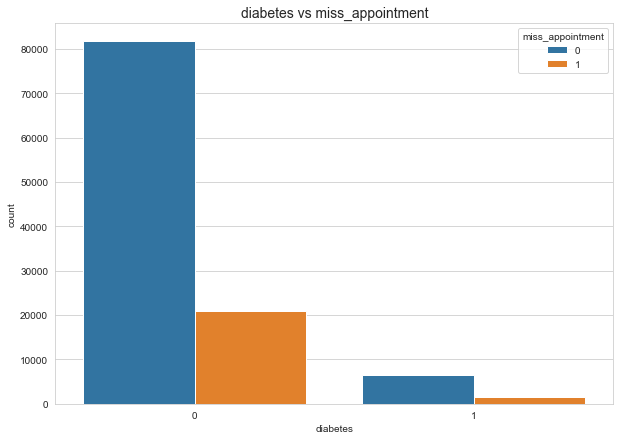

In [57]:
draw_count_plot('diabetes', 'miss_appointment')

In [58]:
df.groupby('diabetes').mean().loc[:, 'miss_appointment']

diabetes
0    0.203630
1    0.180033
Name: miss_appointment, dtype: float64

>We can see that 18% of diabetic patients are miss their appointments, and about 20% of non-diabetic are miss their appointments.

#### *The proportion of medical appointments by alcoholism*

In [59]:
df['alcoholism'].value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

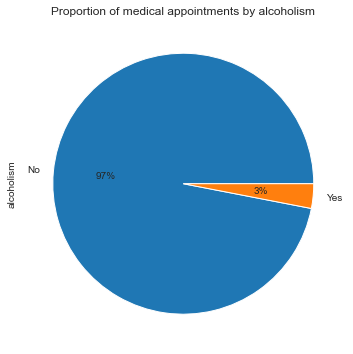

In [60]:
draw_pie_plot('alcoholism')

>We can see that 3% of patients are alcoholics.

In [61]:
df['miss_appointment'].groupby(df["alcoholism"]).value_counts().unstack()

miss_appointment,0,1
alcoholism,,
0,85524,21642
1,2683,677


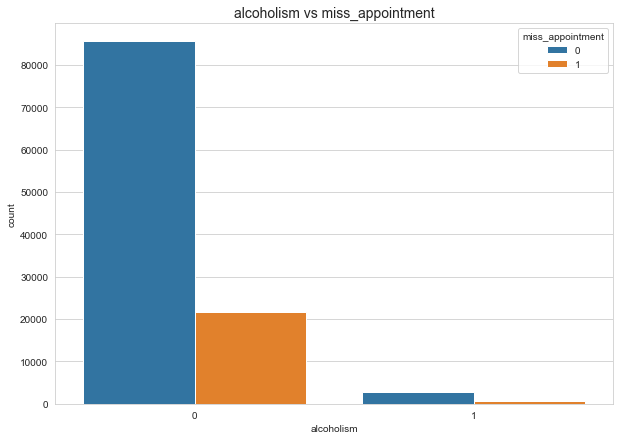

In [62]:
draw_count_plot('alcoholism', 'miss_appointment')

In [63]:
df.groupby('alcoholism').mean().loc[:, 'miss_appointment']

alcoholism
0    0.201948
1    0.201488
Name: miss_appointment, dtype: float64

>We can see that 20% of alcoholic patients are miss their appointments, and about 20% of non-alcoholic are miss their appointments.

### Research Question 6: Does receiving SMS has a relation with appointment showing up?

#### *The proportion of medical appointments by receiving SMS*

In [64]:
df['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

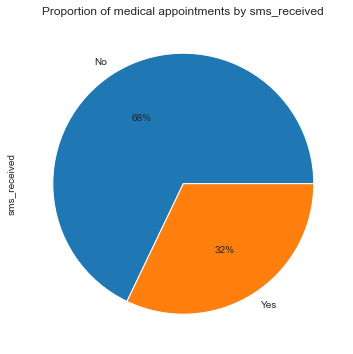

In [65]:
draw_pie_plot('sms_received')

>We can see that 32% of patients are received SMS.

In [66]:
df['miss_appointment'].groupby(df["sms_received"]).value_counts().unstack()

miss_appointment,0,1
sms_received,,
0,62509,12535
1,25698,9784


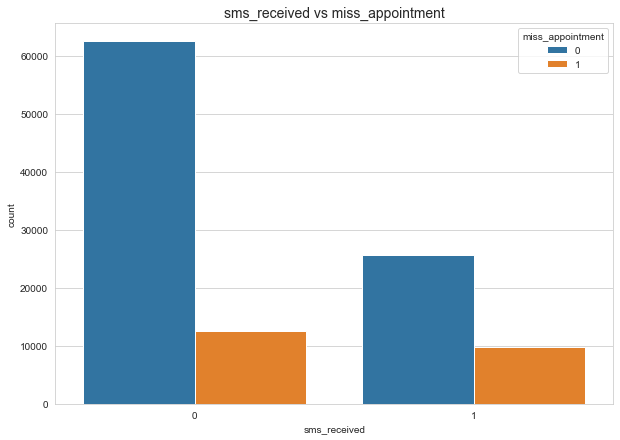

In [67]:
draw_count_plot('sms_received', 'miss_appointment')

In [68]:
df.groupby('sms_received').mean().loc[:, 'miss_appointment']

sms_received
0    0.167035
1    0.275745
Name: miss_appointment, dtype: float64

>We can see that about 28% of patients who received SMS are miss their appointments, and about 17% of patients who not received SMS are miss their appointments.

<a id='conclusions'></a>
## Conclusions

>1 - From the analysis of the data, the percentage of patients who attend their appointments is 80% compared to 20% that not attend their appointments.
>
>2 - The percentage of females have medical appointment is 65% compared to 35% for males.
>
>3 - There are no differences in medical appointment rates with respect to gender type, the two percentages are approximately the same.
>
>4 - The adult patients have higher attendence rates to appointments than other age categories.
>
>5 - JARDIM CAMBURI neighborhood has the most number of appointments.
>
>6 - There are 10% of the patients are enrolled in the Brazilian social welfare program "Bolsa Família", and 76% of them are attend their appointment.
>
>7 - The different diseases have a relation with appointments attendance as following:
>    
> - Handicapped: 2% of patients are handicapped.
>  - Handicapped patients are expected to attend their appointment as 82% of them are attend their appointment.
>
> - Hypertension: 20% of patients have hypertension.
>  - Hypertensive patients are expected to attend their appointment as 83% of them are attend their appointment.
>        
> - Diabetes: 7% of patients are diabetic.
>  - Diabetic patients are expected to attend their appointment as 82% of them are attend their appointment.
>        
> - Alcoholism: 3% of patients are alcoholics.
>  - Alcoholic patients are expected to attend their appointment as 80% of them are attend their appointment.
>
>8 - About 68% of patients didn't recieve SMS, and 83% of them are attend their appointment.

<a id='limitations'></a>
## Limitations

>1 - Data collection period is too small to make predictions as regards patients no-show up factor (data is only for about 3 months).
>
>2 - Information about the distances between each neighbourhood medical center and patients homes is missing and it would be very useful in determining how patients show up for their appointments.
>
>3 - Information about the queue number of each patient is missing and it would be very useful in determining how patients show up for their appointments.
>
>4 - More information must be provided about other disease types (the severity of the medical condition that prompts patients to book appointments).
>
>5 - The data collcetd has more female sample than the male sample, this can lead to a biases in the analysis.